<a href="https://colab.research.google.com/github/Dorsaf-Sdiri/Porto-Seguro/blob/master/Porto_Seguro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd
from google.colab import files


*   Importation des données

In [0]:
uploaded = files.upload()

Saving train.csv to train (1).csv


In [0]:
train= pd.read_csv("train.csv")

In [0]:
train.head()

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,ps_ind_11_bin,ps_ind_12_bin,ps_ind_13_bin,ps_ind_14,ps_ind_15,ps_ind_16_bin,ps_ind_17_bin,ps_ind_18_bin,ps_reg_01,ps_reg_02,ps_reg_03,ps_car_01_cat,ps_car_02_cat,ps_car_03_cat,ps_car_04_cat,ps_car_05_cat,ps_car_06_cat,ps_car_07_cat,ps_car_08_cat,ps_car_09_cat,ps_car_10_cat,ps_car_11_cat,ps_car_11,ps_car_12,ps_car_13,ps_car_14,ps_car_15,ps_calc_01,ps_calc_02,ps_calc_03,ps_calc_04,ps_calc_05,ps_calc_06,ps_calc_07,ps_calc_08,ps_calc_09,ps_calc_10,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,7,0,2,2,5,1,0,0,1,0,0,0,0,0,0,0,11,0,1,0,0.7,0.2,0.718070,10,1,-1,0,1,4,1,0,0,1,12,2,0.400000,0.883679,0.370810,3.605551,0.6,0.5,0.2,3,1,10,1,10,1,5,9,1,5,8,0,1,1,0,0,1
1,9,0,1,1,7,0,0,0,0,1,0,0,0,0,0,0,3,0,0,1,0.8,0.4,0.766078,11,1,-1,0,-1,11,1,1,2,1,19,3,0.316228,0.618817,0.388716,2.449490,0.3,0.1,0.3,2,1,9,5,8,1,7,3,1,1,9,0,1,1,0,1,0
2,13,0,5,4,9,1,0,0,0,1,0,0,0,0,0,0,12,1,0,0,0.0,0.0,-1.000000,7,1,-1,0,-1,14,1,1,2,1,60,1,0.316228,0.641586,0.347275,3.316625,0.5,0.7,0.1,2,2,9,1,8,2,7,4,2,7,7,0,1,1,0,1,0
3,16,0,0,1,2,0,0,1,0,0,0,0,0,0,0,0,8,1,0,0,0.9,0.2,0.580948,7,1,0,0,1,11,1,1,3,1,104,1,0.374166,0.542949,0.294958,2.000000,0.6,0.9,0.1,2,4,7,1,8,4,2,2,2,4,9,0,0,0,0,0,0
4,17,0,0,2,0,1,0,1,0,0,0,0,0,0,0,0,9,1,0,0,0.7,0.6,0.840759,11,1,-1,0,-1,14,1,1,2,1,82,3,0.316070,0.565832,0.365103,2.000000,0.4,0.6,0.0,2,2,6,3,10,2,12,3,1,1,3,0,0,0,1,1,0


In [0]:
train.describe()

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,ps_ind_11_bin,ps_ind_12_bin,ps_ind_13_bin,ps_ind_14,ps_ind_15,ps_ind_16_bin,ps_ind_17_bin,ps_ind_18_bin,ps_reg_01,ps_reg_02,ps_reg_03,ps_car_01_cat,ps_car_02_cat,ps_car_03_cat,ps_car_04_cat,ps_car_05_cat,ps_car_06_cat,ps_car_07_cat,ps_car_08_cat,ps_car_09_cat,ps_car_10_cat,ps_car_11_cat,ps_car_11,ps_car_12,ps_car_13,ps_car_14,ps_car_15,ps_calc_01,ps_calc_02,ps_calc_03,ps_calc_04,ps_calc_05,ps_calc_06,ps_calc_07,ps_calc_08,ps_calc_09,ps_calc_10,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
count,5.952120e+05,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000
mean,7.438036e+05,0.036448,1.900378,1.358943,4.423318,0.416794,0.405188,0.393742,0.257033,0.163921,0.185304,0.000373,0.001692,0.009439,0.000948,0.012451,7.299922,0.660823,0.121081,0.153446,0.610991,0.439184,0.551102,8.295933,0.829931,-0.504899,0.725192,-0.157732,6.555340,0.910027,0.832080,1.328890,0.992136,62.215674,2.346072,0.379945,0.813265,0.276256,3.065899,0.449756,0.449589,0.449849,2.372081,1.885886,7.689445,3.005823,9.225904,2.339034,8.433590,5.441382,1.441918,2.872288,7.539026,0.122427,0.627840,0.554182,0.287182,0.349024,0.153318
std,4.293678e+05,0.187401,1.983789,0.664594,2.699902,0.493311,1.350642,0.488579,0.436998,0.370205,0.388544,0.019309,0.041097,0.096693,0.030768,0.127545,3.546042,0.473430,0.326222,0.360417,0.287643,0.404264,0.793506,2.508270,0.375716,0.788654,2.153463,0.844417,5.501445,0.347106,0.373796,0.978747,0.091619,33.012455,0.832548,0.058327,0.224588,0.357154,0.731366,0.287198,0.286893,0.287153,1.117219,1.134927,1.334312,1.414564,1.459672,1.246949,2.904597,2.332871,1.202963,1.694887,2.746652,0.327779,0.483381,0.497056,0.452447,0.476662,0.360295
min,7.000000e+00,0.000000,0.000000,-1.000000,0.000000,-1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000,-1.000000,0.000000,-1.000000,0.000000,-1.000000,0.000000,1.000000,-1.000000,-1.000000,0.250619,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.719915e+05,0.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,0.000000,0.000000,0.000000,0.400000,0.200000,0.525000,7.000000,1.000000,-1.000000,0.000000,-1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,32.000000,2.000000,0.316228,0.670867,0.333167,2.828427,0.200000,0.200000,0.200000,2.000000,1.000000,7.000000,2.000000,8.000000,1.000000,6.000000,4.000000,1.000000,2.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,7.435475e+05,0.000000,1.000000,1.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.000000,1.000000,0.000000,0.000000,0.700000,0.300000,0.720677,7.000000,1.000000,-1.000000,0.000000,0.000000,7.0000

**EDA**


La librarie rpy2 permet d'écrire un code R en Python

In [0]:
from rpy2.robjects.packages import importr
import rpy2.robjects as ro
ggplot2 = importr('ggplot2')

In [0]:
import rpy2.robjects.packages as packages
import rpy2.robjects.lib.ggplot2 as ggplot2
import rpy2.robjects as ro
from rpy2.robjects import pandas2ri
pandas2ri.activate()
R = ro.r

gp = ggplot2.ggplot(train)
gp + ggplot2.aes_string(x='ps_ind_01', y='target')
gp.show()
R("dev.copy(png,'/tmp/out.png')")


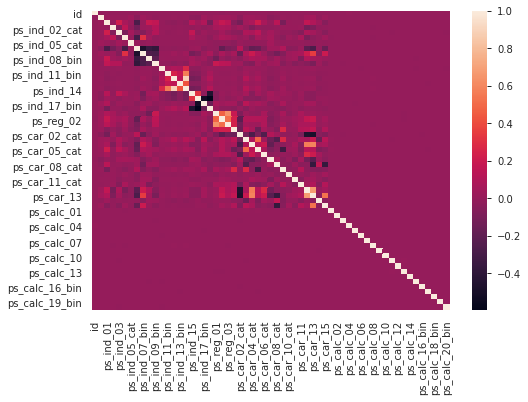

In [0]:
numerical_df = train.select_dtypes(include=['int', 'float'])
corr = numerical_df.corr()
import seaborn as sns
sns.heatmap(corr)

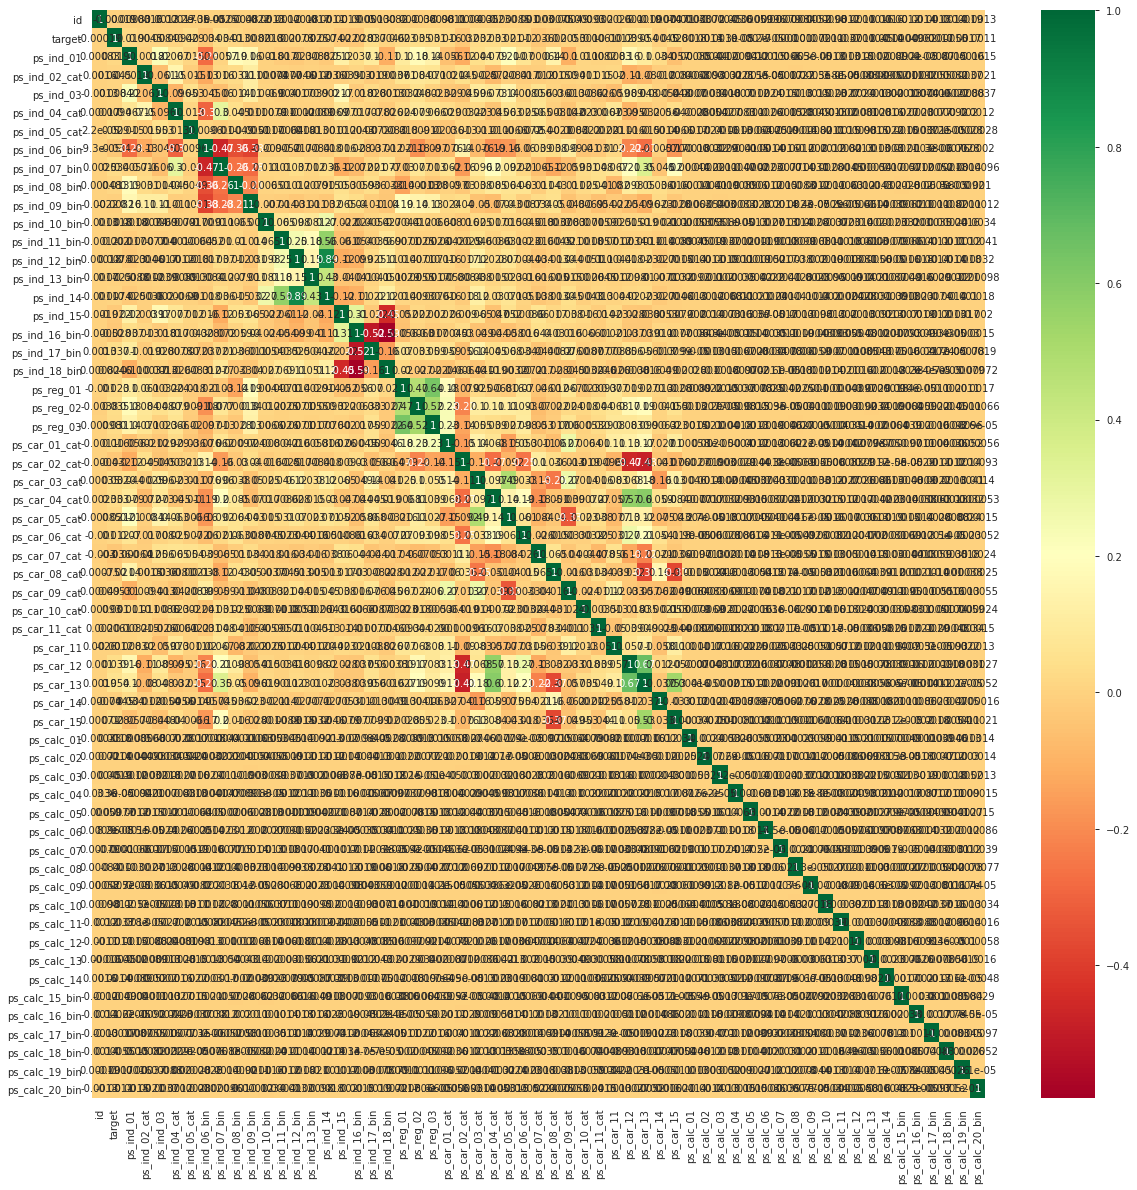

In [0]:
top_corr_features = corr.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(corr,annot=True,cmap="RdYlGn")

In [0]:
import pandas_profiling
pandas_profiling.ProfileReport(pd.DataFrame(train))


In [0]:
import matplotlib.pyplot as plt
import plotly.graph_objs as go
import plotly.offline as py

In [0]:
bin_col = [col for col in train.columns if '_bin' in col]
zero_list = []
one_list = []
for col in bin_col:
    zero_list.append((train[col]==0).sum())
    one_list.append((train[col]==1).sum())

In [0]:
import plotly.express as px
fig = px.bar(train, x="ps_ind_01", y="target")
fig.show()

In [0]:
trace1 = go.Bar(
    x=bin_col,
    y=zero_list ,
    name='Zero count'
)
trace2 = go.Bar(
    x=bin_col,
    y=one_list,
    name='One count'
)

data = [trace1, trace2]
layout = go.Layout(
    barmode='stack',
    title='Count of 1 and 0 in binary variables'
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='stacked-bar')

ps_ind_10_bin, ps_ind_11_bin, ps_ind_12_bin, ps_ind_13_bin ont une seule modalité "0". Il est préférable de s'en débarasser 

Missing values/ Data quality check

In [0]:
train.isnull().mean() * 100

id                0.0
target            0.0
ps_ind_01         0.0
ps_ind_02_cat     0.0
ps_ind_03         0.0
ps_ind_04_cat     0.0
ps_ind_05_cat     0.0
ps_ind_06_bin     0.0
ps_ind_07_bin     0.0
ps_ind_08_bin     0.0
ps_ind_09_bin     0.0
ps_ind_10_bin     0.0
ps_ind_11_bin     0.0
ps_ind_12_bin     0.0
ps_ind_13_bin     0.0
ps_ind_14         0.0
ps_ind_15         0.0
ps_ind_16_bin     0.0
ps_ind_17_bin     0.0
ps_ind_18_bin     0.0
ps_reg_01         0.0
ps_reg_02         0.0
ps_reg_03         0.0
ps_car_01_cat     0.0
ps_car_02_cat     0.0
ps_car_03_cat     0.0
ps_car_04_cat     0.0
ps_car_05_cat     0.0
ps_car_06_cat     0.0
ps_car_07_cat     0.0
ps_car_08_cat     0.0
ps_car_09_cat     0.0
ps_car_10_cat     0.0
ps_car_11_cat     0.0
ps_car_11         0.0
ps_car_12         0.0
ps_car_13         0.0
ps_car_14         0.0
ps_car_15         0.0
ps_calc_01        0.0
ps_calc_02        0.0
ps_calc_03        0.0
ps_calc_04        0.0
ps_calc_05        0.0
ps_calc_06        0.0
ps_calc_07

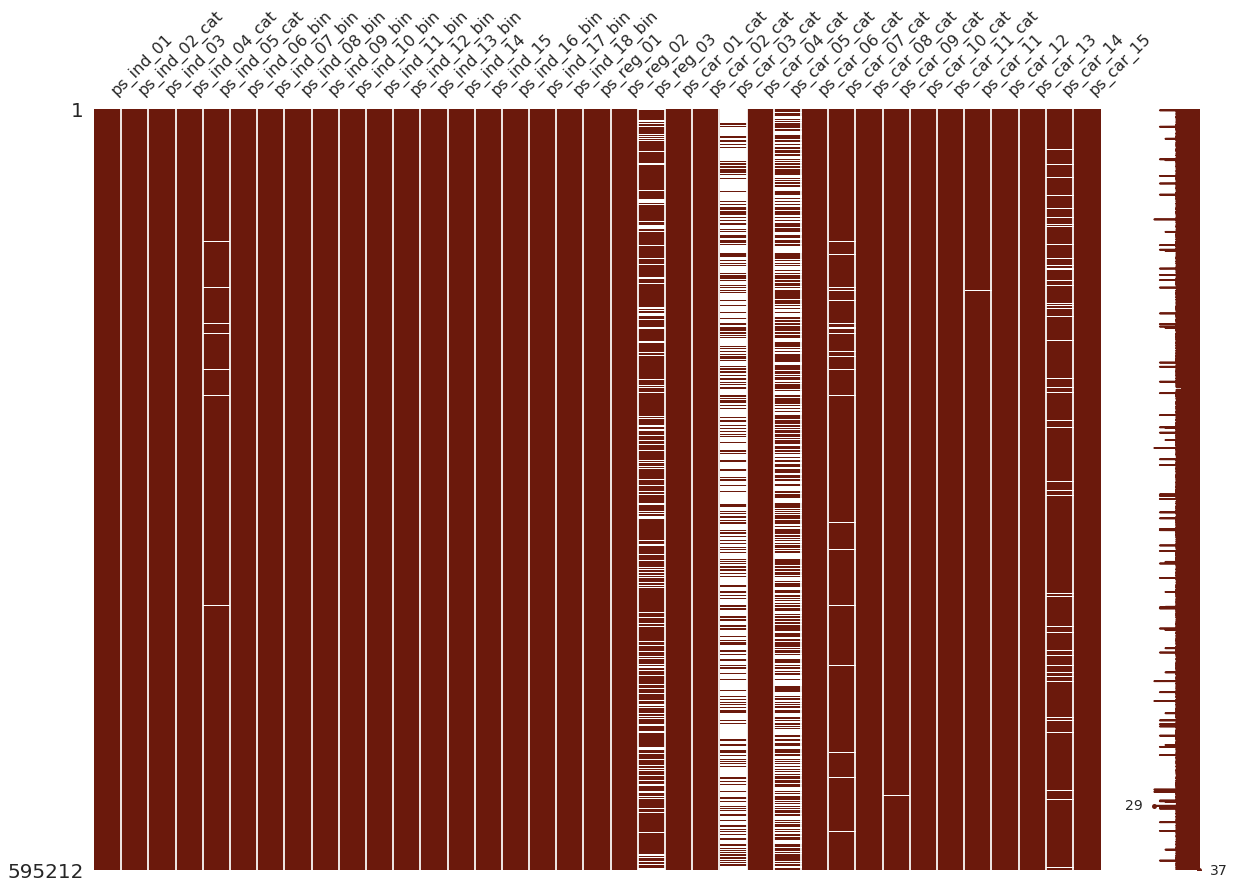

In [0]:
train_copy = train
train_copy = train_copy.replace(-1, np.NaN)
import missingno as msno
# Nullity or missing values by columns
msno.matrix(df=train_copy.iloc[:,2:39], figsize=(20, 14), color=(0.42, 0.1, 0.05))


Pre processing

In [0]:
from sklearn.preprocessing import StandardScaler
X=train.drop(['target'], axis =1)  # Features
y=train['target'] 
X = StandardScaler().fit_transform(X)

In [0]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
train['ps_car_04_cat']=train..astype(str)
train['ps_car_04_cat'] = le.fit_transform(train['ps_car_04_cat'])

Feature Engineering

In [0]:
from sklearn.decomposition import PCA
pca = PCA(n_components=4)
principalComponents = pca.fit_transform(X)
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2','principal component 3', 'principal component 4'])

In [100]:
principalDf

,principal component 1,principal component 2,principal component 3,principal component 4
0,-0.639000,0.645043,0.282658,-2.767176
1,-1.892804,0.029548,0.905885,-1.369998
2,-3.492729,0.304782,-1.204273,0.636592
3,-1.065060,0.336384,-1.420571,-1.984133
4,-2.141337,-0.739471,2.157012,3.357634
...,...,...,...,...
586923,-0.783480,-1.272971,0.854297,2.406432
586924,1.560581,-0.903004,1.413115,-0.914036
586925,-2.149770,-0.597027,0.808908,0.151489
586926,0.065519,-1.371788,1.297615,0.855143


Feature Importance

En utilisant Random Forest et XGBoostError

In [0]:
X=train.drop(['target'], axis =1)  # Features
y=train['target'] 

In [0]:
from sklearn.model_selection import train_test_split  
X_train ,X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)  
 

Class 0: 458859
Class 1: 17310
Proportion: 26.51 : 1


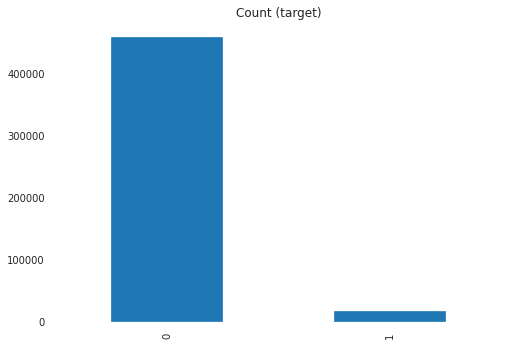

In [0]:
target_count = y_train.value_counts()
print('Class 0:', target_count[0])
print('Class 1:', target_count[1])
print('Proportion:', round(target_count[0] / target_count[1], 2), ': 1')
target_count.plot(kind='bar', title='Count (target)');

In [0]:
from collections import Counter
from imblearn.combine import SMOTETomek
sm = SMOTETomek(random_state=0)
X_res1, y_res1 = sm.fit_resample(X_train,y_train)
X_res1= pd.DataFrame(X_res1,columns=list(X_train.columns))
y_res1= pd.DataFrame(y_res1)

In [0]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier

clf2 = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
          max_depth=15, max_features='auto', max_leaf_nodes=None,
          min_impurity_decrease=0.0, min_impurity_split=None,
          min_samples_leaf=4, min_samples_split=5,
          min_weight_fraction_leaf=0.0, n_estimators=150, n_jobs=-1,
          oob_score=False, random_state=100, verbose=0, warm_start=False)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf2.fit(X_res1,y_res1)



RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=15, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, n_estimators=150,
                       n_jobs=-1, oob_score=False, random_state=100, verbose=0,
                       warm_start=False)

In [0]:
def plot_feature_importances(clf, X_train, y_train=None, 
                             top_n=10, figsize=(8,8), print_table=False, title="Feature Importances"):
    '''
    plot feature importances of a tree-based sklearn estimator
    
    Note: X_train and y_train are pandas DataFrames
    
    Note: Scikit-plot is a lovely package but I sometimes have issues
              1. flexibility/extendibility
              2. complicated models/datasets
          But for many situations Scikit-plot is the way to go
          see https://scikit-plot.readthedocs.io/en/latest/Quickstart.html
    
    Parameters
    ----------
        clf         (sklearn estimator) if not fitted, this routine will fit it
        
        X_train     (pandas DataFrame)
        
        y_train     (pandas DataFrame)  optional
                                        required only if clf has not already been fitted 
        
        top_n       (int)               Plot the top_n most-important features
                                        Default: 10
                                        
        figsize     ((int,int))         The physical size of the plot
                                        Default: (8,8)
        
        print_table (boolean)           If True, print out the table of feature importances
                                        Default: False
        
    Returns
    -------
        the pandas dataframe with the features and their importance
        
    Author
    ------
        George Fisher
    '''
    
    __name__ = "plot_feature_importances"
    
    import pandas as pd
    import numpy  as np
    import matplotlib.pyplot as plt
    
    from xgboost.core     import XGBoostError
    from lightgbm.sklearn import LightGBMError
    
    try: 
        if not hasattr(clf, 'feature_importances_'):
            clf.fit(X_train.values, y_train.values.ravel())

            if not hasattr(clf, 'feature_importances_'):
                raise AttributeError("{} does not have feature_importances_ attribute".
                                    format(clf.__class__.__name__))
                
    except (XGBoostError, LightGBMError, ValueError):
        clf.fit(X_train.values, y_train.values.ravel())
            
    feat_imp = pd.DataFrame({'importance':clf.feature_importances_})    
    feat_imp['feature'] = X_train.columns
    feat_imp.sort_values(by='importance', ascending=False, inplace=True)
    feat_imp = feat_imp.iloc[:top_n]
    
    feat_imp.sort_values(by='importance', inplace=True)
    feat_imp = feat_imp.set_index('feature', drop=True)
    feat_imp.plot.barh(title=title, figsize=figsize)
    plt.xlabel('Feature Importance Score')
    plt.show()
    
    if print_table:
        from IPython.display import display
        print("Top {} features in descending order of importance".format(top_n))
        display(feat_imp.sort_values(by='importance', ascending=False))
        
    return feat_imp

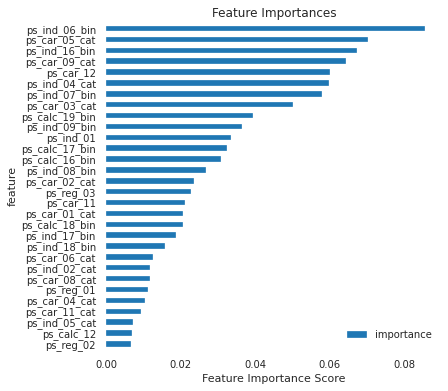

,importance
feature,
ps_reg_02,0.006587
ps_calc_12,0.006909
ps_ind_05_cat,0.007251
ps_car_11_cat,0.009296
ps_car_04_cat,0.010424
ps_reg_01,0.011221
ps_car_08_cat,0.011670
ps_ind_02_cat,0.011707
ps_car_06_cat,0.012592


In [0]:
plot_feature_importances(clf2, X_res1, y_train=y_res1, 
                             top_n=30, figsize=(6,6), print_table=False, title="Feature Importances")

In [0]:
def plot_feature_importances2(clf, X_train, y_train=None, 
                             top_n=30):
    '''
    plot feature importances of a tree-based sklearn estimator
    
    Note: X_train and y_train are pandas DataFrames
    
    Note: Scikit-plot is a lovely package but I sometimes have issues
              1. flexibility/extendibility
              2. complicated models/datasets
          But for many situations Scikit-plot is the way to go
          see https://scikit-plot.readthedocs.io/en/latest/Quickstart.html
    
    Parameters
    ----------
        clf         (sklearn estimator) if not fitted, this routine will fit it
        
        X_train     (pandas DataFrame)
        
        y_train     (pandas DataFrame)  optional
                                        required only if clf has not already been fitted 
        
        top_n       (int)               Plot the top_n most-important features
                                        Default: 10
                                        
        figsize     ((int,int))         The physical size of the plot
                                        Default: (8,8)
        
        print_table (boolean)           If True, print out the table of feature importances
                                        Default: False
        
    Returns
    -------
        the pandas dataframe with the features and their importance
        
    Author
    ------
        George Fisher
    '''
    
    __name__ = "plot_feature_importances"
    
    import pandas as pd
    import numpy  as np
    import matplotlib.pyplot as plt
    
    from xgboost.core     import XGBoostError
    from lightgbm.sklearn import LightGBMError
    
    try: 
        if not hasattr(clf, 'feature_importances_'):
            clf.fit(X_train.values, y_train.values.ravel())

            if not hasattr(clf, 'feature_importances_'):
                raise AttributeError("{} does not have feature_importances_ attribute".
                                    format(clf.__class__.__name__))
                
    except (XGBoostError, LightGBMError, ValueError):
        clf.fit(X_train.values, y_train.values.ravel())
            
    feat_imp = pd.DataFrame({'importance':clf.feature_importances_})    
    feat_imp['feature'] = X_train.columns
    feat_imp.sort_values(by='importance', ascending=False, inplace=True)
    feat_imp = feat_imp.iloc[:top_n]
    
    
    
        
    return feat_imp['feature'].tolist()

In [0]:
final_list = plot_feature_importances2(clf2, X_res1, y_train=y_res1,top_n=30)
final_list

['ps_ind_06_bin',
 'ps_car_05_cat',
 'ps_ind_16_bin',
 'ps_car_09_cat',
 'ps_car_12',
 'ps_ind_04_cat',
 'ps_ind_07_bin',
 'ps_car_03_cat',
 'ps_calc_19_bin',
 'ps_ind_09_bin',
 'ps_ind_01',
 'ps_calc_17_bin',
 'ps_calc_16_bin',
 'ps_ind_08_bin',
 'ps_car_02_cat',
 'ps_reg_03',
 'ps_car_11',
 'ps_car_01_cat',
 'ps_calc_18_bin',
 'ps_ind_17_bin',
 'ps_ind_18_bin',
 'ps_car_06_cat',
 'ps_ind_02_cat',
 'ps_car_08_cat',
 'ps_reg_01',
 'ps_car_04_cat',
 'ps_car_11_cat',
 'ps_ind_05_cat',
 'ps_calc_12',
 'ps_reg_02']

In [0]:
from sklearn.tree import export_graphviz
import pydot
feature_list = list(X_test.columns)# Convert to numpy array
features = np.array(X_test)
tree_small = clf2.estimators_[5]# Save the tree as a png image
export_graphviz(tree_small, out_file = 'Tree.dot', feature_names = feature_list, rounded = True, precision = 1)
(graph, ) = pydot.graph_from_dot_file('Tree.dot')
graph.write_png('Tree.png');

Feature Selection with Chi2

In [0]:
# Supprimer les lignes dont les valeurs sont négatifs (Chi2 ne s'applique que sur les valeurs positifs)
for i in range (0,595212):
  for cols in range(0,57):
    if X[i,cols]  < 0:
      X = np.delete(X, (i), axis=0)


In [0]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
y=train['target'] 
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X1,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X1.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']
#naming the dataframe columns
mydata = featureScores.nlargest(40,'Score')
print(mydata)

Different Algorithms & Models

H2O *AutoML*

La librarie H2O AutoML présente un panel d'algorithmes et de techniques pour choisir le modèle optimal

In [0]:
import h2o
from h2o.automl import H2OAutoML
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.6" 2020-01-14; OpenJDK Runtime Environment (build 11.0.6+10-post-Ubuntu-1ubuntu118.04.1); OpenJDK 64-Bit Server VM (build 11.0.6+10-post-Ubuntu-1ubuntu118.04.1, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.6/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmpbjx61pji
  JVM stdout: /tmp/tmpbjx61pji/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmpbjx61pji/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,06 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.30.0.1
H2O_cluster_version_age:,19 days
H2O_cluster_name:,H2O_from_python_unknownUser_mqyfgo
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.180 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"accepting new members, healthy"


In [0]:
frame = h2o.H2OFrame(train)

Parse progress: |█████████████████████████████████████████████████████████| 100%


In [0]:
aml = H2OAutoML(max_runtime_secs = 60, seed = 1, project_name = "powerplant_lb_frame")
aml.train(y = "target", training_frame = frame)

AutoML progress: |████████████████████████████████████████████████████████| 100%

12:55:05.882: Empty leaderboard.
AutoML was not able to build any model within a max runtime constraint of 60 seconds, you may want to increase this value before retrying.



In [0]:
aml.leaderboard.head()


This H2OFrame is empty.


Ce leaderboard est vide car le nombre de variables et élevés et la computation ne s'est pas terminé pour retourner des modèles. Pour cette raison, je vais résuire la taille des données en utilisant ACP (Analyse en composantes principales) et éventuellement ne travailler qu'avec 4 variables pour ne pas alourdir le calcul  

In [0]:
principalDf['target'] = train['target']

In [103]:
frame2 = h2o.H2OFrame(principalDf)

Parse progress: |█████████████████████████████████████████████████████████| 100%


In [104]:
aml2 = H2OAutoML(max_runtime_secs = 60, seed = 1, project_name = "powerplant_lb_frame")
aml2.train(y = "target", training_frame = frame2)

AutoML progress: |
12:55:05.882: Empty leaderboard.
AutoML was not able to build any model within a max runtime constraint of 60 seconds, you may want to increase this value before retrying.
13:28:35.841: New models will be added to existing leaderboard powerplant_lb_frame@@target (leaderboard frame=null) with already 0 models.

████████████████████████████████████████████████████████| 100%


In [105]:
aml2.leaderboard.head()

model_id,mean_residual_deviance,rmse,mse,mae,rmsle
StackedEnsemble_AllModels_AutoML_20200423_132835,0.035108,0.187371,0.035108,0.070216,0.130302
XGBoost_2_AutoML_20200423_132835,0.14038,0.374673,0.14038,0.371026,0.311274
XGBoost_1_AutoML_20200423_132835,0.140475,0.3748,0.140475,0.371161,0.311371


Different Algorithms

In [0]:
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from collections import Counter
from imblearn.over_sampling import SMOTE # doctest: +NORMALIZE_WHITESPACE
# load dataset
X=train.drop(['target'], axis =1)  # Features
Y=train['target'] 
# prepare configuration for cross validation test harness
seed = 7
# prepare models
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
# evaluate each model in turn
results = []
results_test=[]
names = []
scoring = 'accuracy'
for name, model in models:
    kfold = model_selection.KFold(n_splits=2, random_state=seed)
    cv_results = model_selection.cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
    
    
    model.fit(X_res1,y_res1)
    score_test = model.score(X_test, y_test)
    results_test.append(score_test)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), score_test.mean())
    print(msg)
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

LR: 0.963552 (0.963173)
LDA: 0.963549 (0.630293)
KNN: 0.963552 (0.653403)
CART: 0.825657 (0.917232)
NB: 0.963552 (0.199919)


Afin de minimiser l'erreur, on choisit déliberérement notre algorithme qui fera un compromis entre l'erreur liée au bias et l'erreur liée au variance: Dans notre cas, On a besoin d'un algorithme simple comme la regression logistique 

Les algorithmes LDA, KNN, GaussianNB ont une tendance à la sur-adaptation(overfitting) puisqu'elles utilisent beaucoup de paramètres, innécessaire pour notre simple problème, mais très utile pour d'autres types de données dont la variance est élévé. 

Train the model 

Logistic regression

In [0]:
complete_list = ['target', 'ps_ind_06_bin','ps_car_05_cat','ps_ind_16_bin','ps_car_09_cat','ps_car_12','ps_ind_04_cat','ps_ind_07_bin','ps_car_03_cat','ps_calc_19_bin','ps_ind_09_bin','ps_ind_01','ps_calc_17_bin','ps_calc_16_bin','ps_ind_08_bin','ps_car_02_cat','ps_reg_03','ps_car_11','ps_car_01_cat','ps_calc_18_bin','ps_ind_17_bin','ps_ind_18_bin','ps_car_06_cat','ps_ind_02_cat','ps_car_08_cat','ps_reg_01','ps_car_04_cat','ps_car_11_cat','ps_ind_05_cat','ps_calc_12','ps_reg_02']

In [0]:
from imblearn.under_sampling import RandomUnderSampler
undersample = RandomUnderSampler(sampling_strategy='majority')
X_under, y_under = undersample.fit_resample(X_train, y_train)

In [0]:
reg = linear_model.LinearRegression() 
  
# train the model using the training sets 
reg.fit(X_under, y_under) 
  
# regression coefficients 
print('Coefficients: \n', reg.coef_) 
  
# variance score: 1 means perfect prediction 
print('Variance score: {}'.format(reg.score(X_test, y_test))) 
  
# plot for residual error 
  
## setting plot style 
plt.style.use('fivethirtyeight') 
  
## plotting residual errors in training data 
plt.scatter(reg.predict(X_train), reg.predict(X_train) - y_train, 
            color = "green", s = 10, label = 'Train data') 
  
## plotting residual errors in test data 
plt.scatter(reg.predict(X_test), reg.predict(X_test) - y_test, 
            color = "blue", s = 10, label = 'Test data') 
  
## plotting line for zero residual error 
plt.hlines(y = 0, xmin = 0, xmax = 50, linewidth = 2) 
  
## plotting legend 
plt.legend(loc = 'upper right') 
  
## plot title 
plt.title("Residual errors") 
  
## function to show plot 
plt.show() 




In [0]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
y_pred4 = cross_val_predict(clf4, X_res4, y_res4, cv=10)
conf_mat = confusion_matrix(y_res4, y_pred4)

In [0]:
conf_mat

In [0]:
clf4.score(X_test, y_test)

Test the model

In [0]:
uploaded = files.upload()

Saving sample_submission.csv to sample_submission.csv
Saving test.csv to test.csv
Saving train.csv to train.csv


In [0]:
sample_submission = pd.read_csv("sample_submission.csv")
test = pd.read_csv("test.csv")
